In [55]:
import numpy as np
import pandas as pd
import missingno as mano

In [56]:
df=pd.read_csv("df_arabica_clean.csv")

# ***Fixing Data Types and MVA***

In [57]:
df.info() #First step of EDA to check out what type every column is

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207 entries, 0 to 206
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Unnamed: 0             207 non-null    int64  
 1   ID                     207 non-null    int64  
 2   Country of Origin      207 non-null    object 
 3   Farm Name              205 non-null    object 
 4   Lot Number             206 non-null    object 
 5   Mill                   204 non-null    object 
 6   ICO Number             75 non-null     object 
 7   Company                207 non-null    object 
 8   Altitude               206 non-null    object 
 9   Region                 205 non-null    object 
 10  Producer               206 non-null    object 
 11  Number of Bags         207 non-null    int64  
 12  Bag Weight             207 non-null    object 
 13  In-Country Partner     207 non-null    object 
 14  Harvest Year           207 non-null    object 
 15  Gradin

In [58]:
df.describe().T #Check statistics of every column

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,207.0,103.000000,59.899917,0.00,51.50,103.00,154.500,206.00
ID,207.0,103.000000,59.899917,0.00,51.50,103.00,154.500,206.00
Number of Bags,207.0,155.449275,244.484868,1.00,1.00,14.00,275.000,2240.00
Aroma,207.0,7.721063,0.287626,6.50,7.58,7.67,7.920,8.58
Flavor,207.0,7.744734,0.279613,6.75,7.58,7.75,7.920,8.50
Aftertaste,207.0,7.599758,0.275911,6.67,7.42,7.58,7.750,8.42
Acidity,207.0,7.690290,0.259510,6.83,7.50,7.67,7.875,8.58
Body,207.0,7.640918,0.233499,6.83,7.50,7.67,7.750,8.25
Balance,207.0,7.644058,0.256299,6.67,7.50,7.67,7.790,8.42
Uniformity,207.0,9.990338,0.103306,8.67,10.00,10.00,10.000,10.00


In [59]:
df.isnull().sum() #Checking empty in Columns

Unnamed: 0                 0
ID                         0
Country of Origin          0
Farm Name                  2
Lot Number                 1
Mill                       3
ICO Number               132
Company                    0
Altitude                   1
Region                     2
Producer                   1
Number of Bags             0
Bag Weight                 0
In-Country Partner         0
Harvest Year               0
Grading Date               0
Owner                      0
Variety                    6
Status                     0
Processing Method          5
Aroma                      0
Flavor                     0
Aftertaste                 0
Acidity                    0
Body                       0
Balance                    0
Uniformity                 0
Clean Cup                  0
Sweetness                  0
Overall                    0
Defects                    0
Total Cup Points           0
Moisture Percentage        0
Category One Defects       0
Quakers       

In [60]:
# Display the column names in your DataFrame
print(df.columns)

Index(['Unnamed: 0', 'ID', 'Country of Origin', 'Farm Name', 'Lot Number',
       'Mill', 'ICO Number', 'Company', 'Altitude', 'Region', 'Producer',
       'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Harvest Year',
       'Grading Date', 'Owner', 'Variety', 'Status', 'Processing Method',
       'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance',
       'Uniformity', 'Clean Cup', 'Sweetness', 'Overall', 'Defects',
       'Total Cup Points', 'Moisture Percentage', 'Category One Defects',
       'Quakers', 'Color', 'Category Two Defects', 'Expiration',
       'Certification Body', 'Certification Address', 'Certification Contact'],
      dtype='object')


<Axes: >

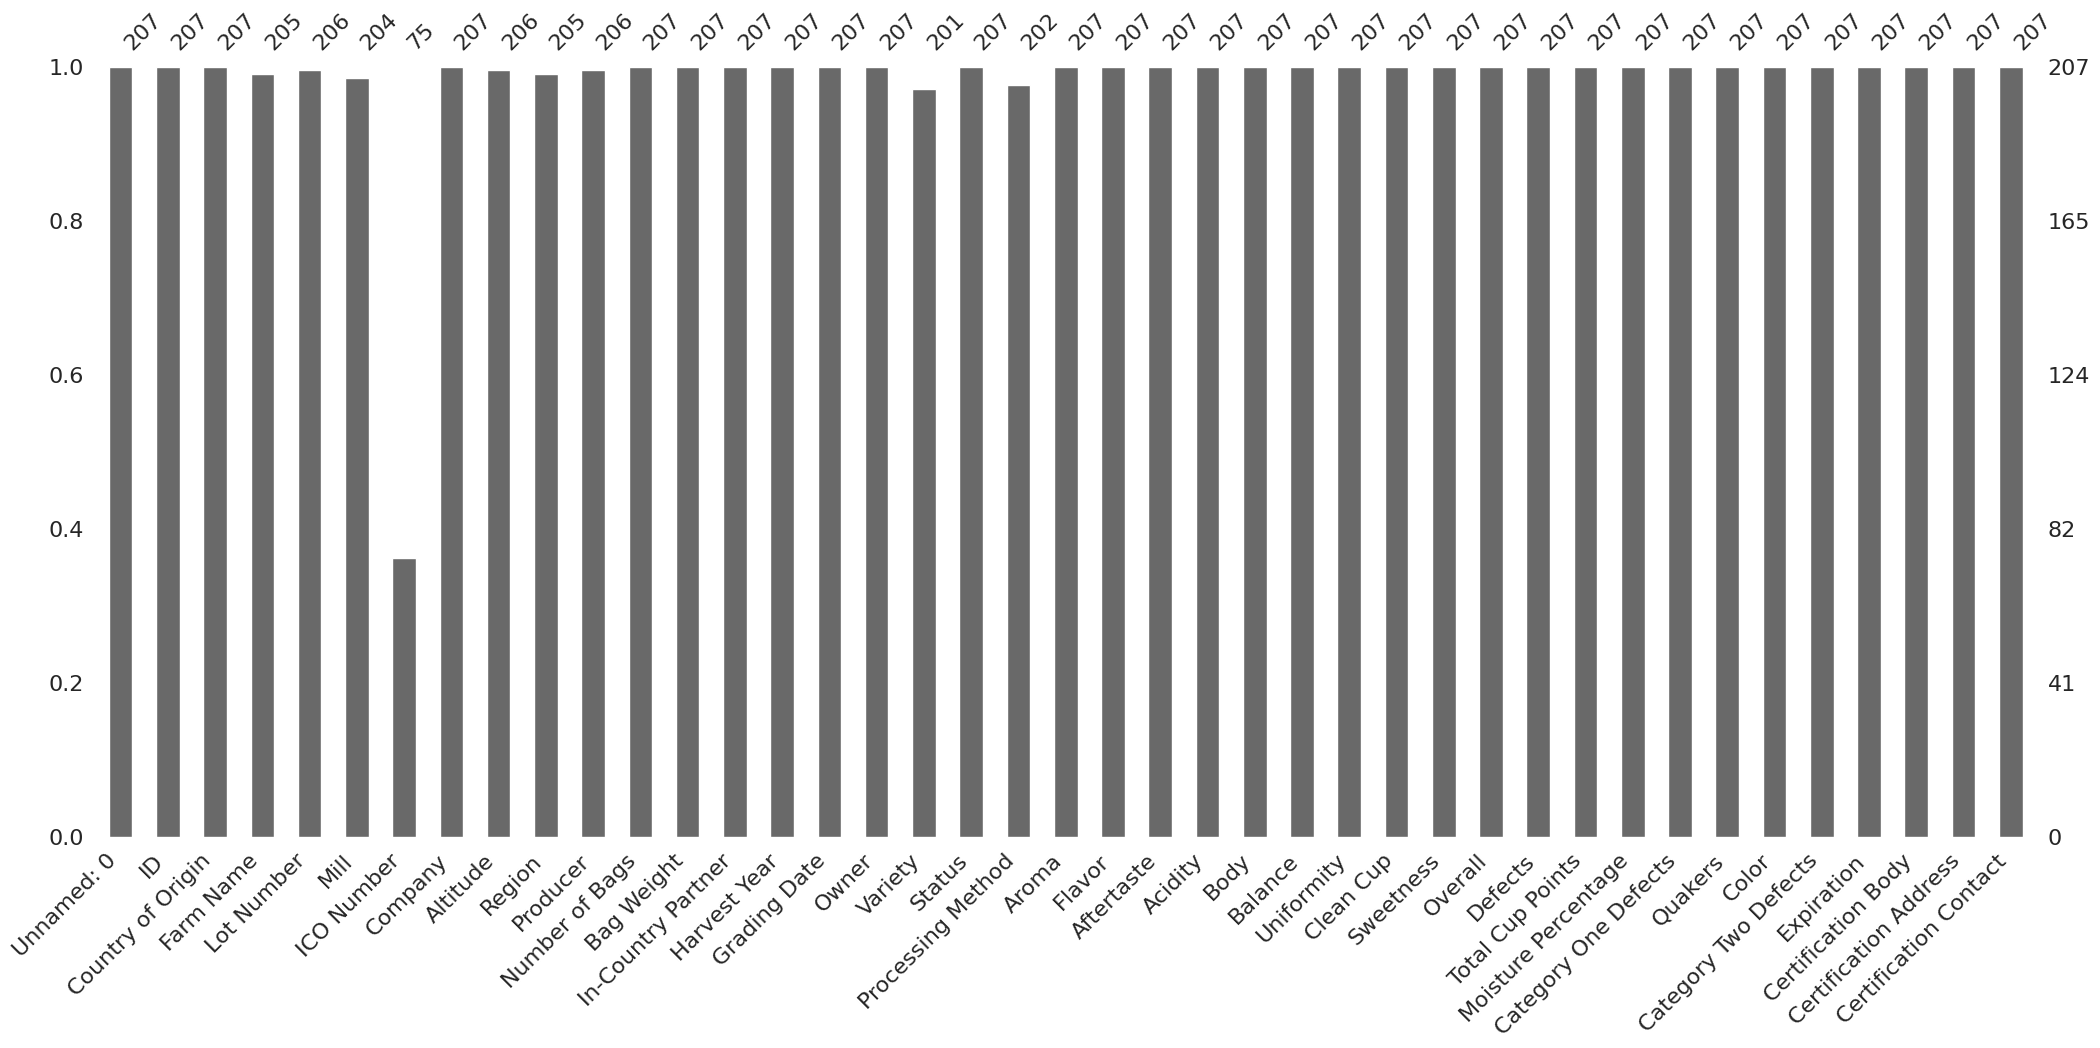

In [61]:
mano.bar(df)

<Axes: >

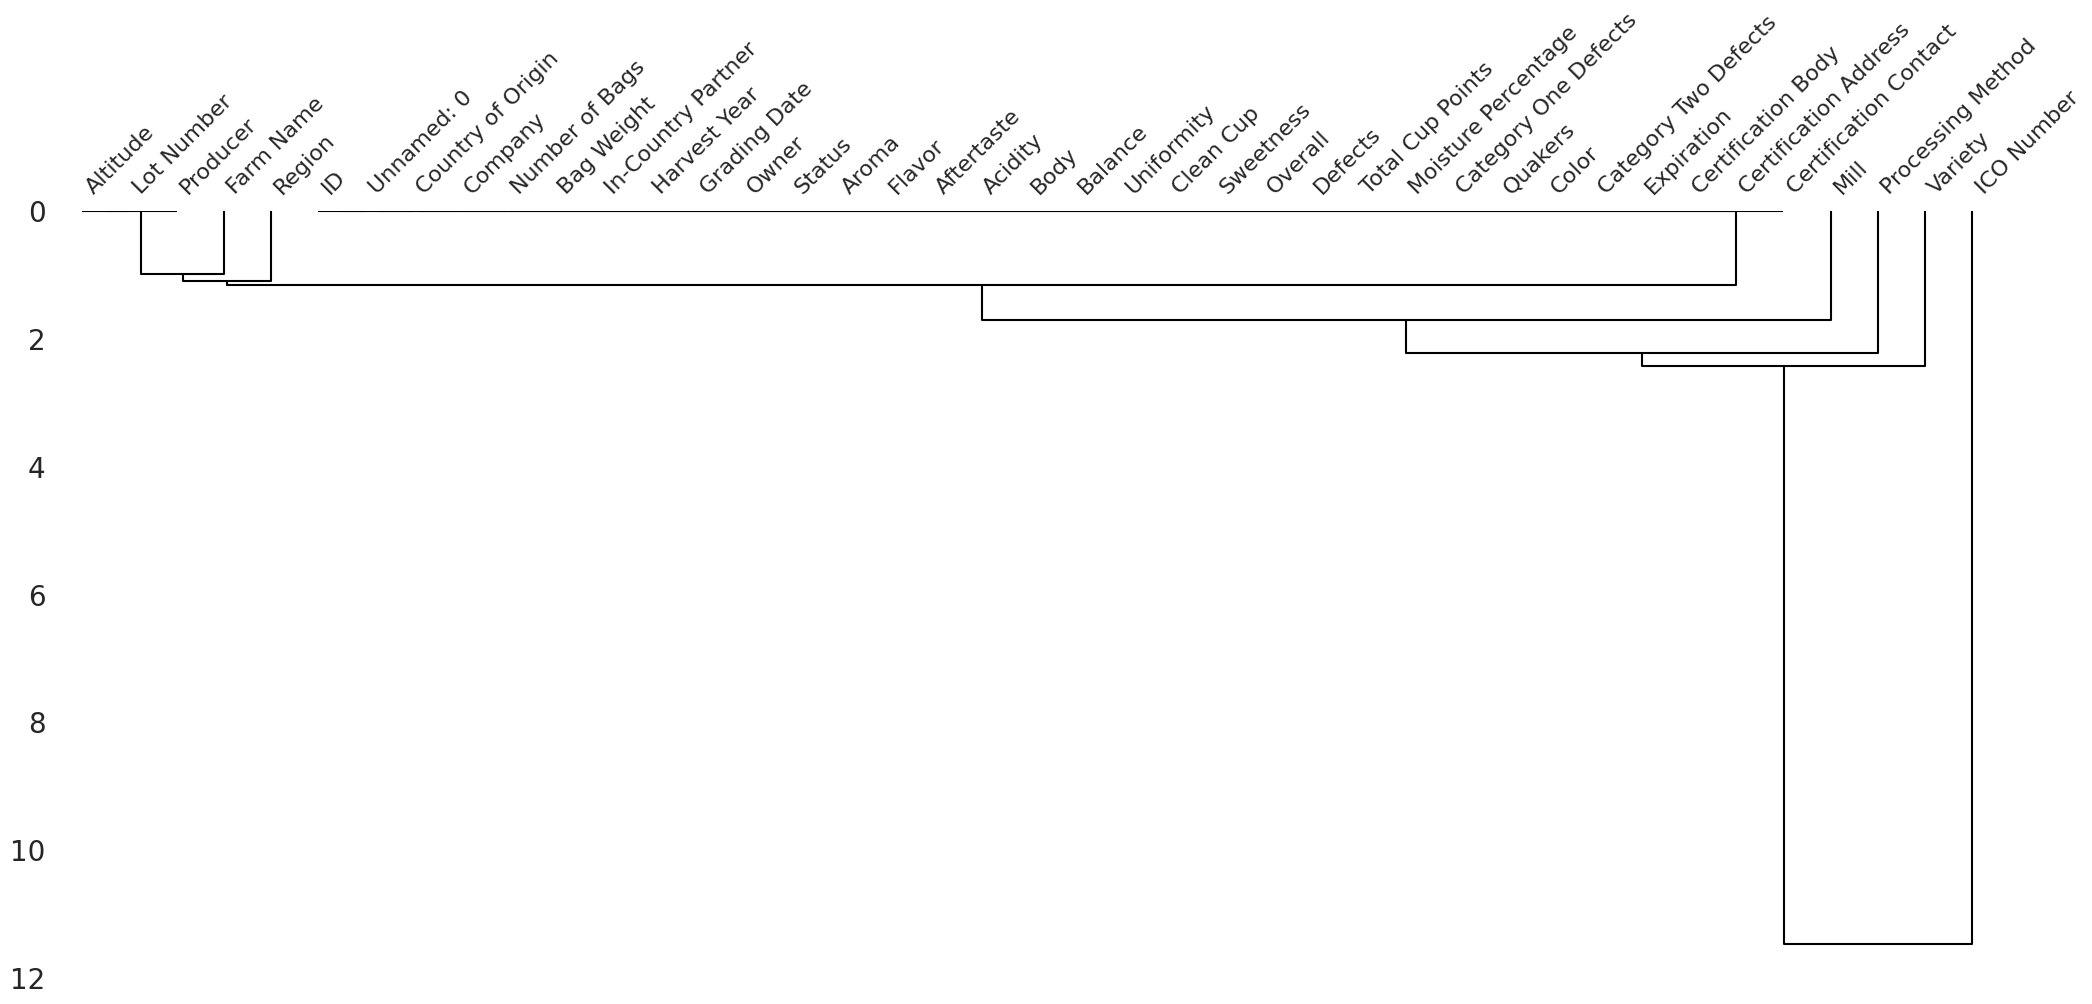

In [62]:
mano.dendrogram(df)

In [63]:
df.loc[df['ID'] == 99, 'Altitude'] = 5033
df.loc[df['ID'] == 105, 'Altitude'] = 1920
df.loc[df['ID'] == 180, 'Altitude'] = 1510

def clean_altitude_range(range_value):
    if isinstance(range_value, str):
        range_value = range_value.replace(" ", "")
        if '-' in range_value:
            try:
                start, end = range_value.split('-')
                start = int(start)
                end = int(end)
                return (start + end) / 2
            except ValueError:
                return np.nan
        else:
            try:
                return int(range_value)
            except ValueError:
                return np.nan
    else:
        return range_value

df['Altitude'] = df['Altitude'].apply(clean_altitude_range)


In [64]:
df['Variety'].fillna('Unknown', inplace=True)

In [65]:
processing_method_mode = df['Processing Method'].mode().iloc[0]

df['Processing Method'].fillna(processing_method_mode, inplace=True)


In [66]:
df['Farm Name'].fillna(df['Farm Name'].mode().iloc[0], inplace=True)
df['Region'].fillna(df['Region'].mode().iloc[0], inplace=True)

In [67]:
df = df.dropna(subset=['Lot Number'])

In [68]:

mill_mode = df['Mill'].mode().iloc[0]

df['Mill'].fillna(mill_mode, inplace=True)

<ipython-input-68-4e45493fa496>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [69]:
df.drop(["Unnamed: 0", "ID", "ICO Number", "Defects"], inplace=True, axis=1)

<ipython-input-69-181e0eeb3c07>:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [70]:
df.isnull().sum() #Checking empty in Columns

Country of Origin        0
Farm Name                0
Lot Number               0
Mill                     0
Company                  0
Altitude                 0
Region                   0
Producer                 0
Number of Bags           0
Bag Weight               0
In-Country Partner       0
Harvest Year             0
Grading Date             0
Owner                    0
Variety                  0
Status                   0
Processing Method        0
Aroma                    0
Flavor                   0
Aftertaste               0
Acidity                  0
Body                     0
Balance                  0
Uniformity               0
Clean Cup                0
Sweetness                0
Overall                  0
Total Cup Points         0
Moisture Percentage      0
Category One Defects     0
Quakers                  0
Color                    0
Category Two Defects     0
Expiration               0
Certification Body       0
Certification Address    0
Certification Contact    0
d

In [71]:
df.head().T

,0,1,2,3,4
Country of Origin,Colombia,Taiwan,Laos,Costa Rica,Colombia
Farm Name,Finca El Paraiso,Royal Bean Geisha Estate,OKLAO coffee farms,La Cumbre,Finca Santuario
Lot Number,CQU2022015,"The 2022 Pacific Rim Coffee Summit,T037","The 2022 Pacific Rim Coffee Summit,LA01",CQU2022017,CQU2023002
Mill,Finca El Paraiso,Royal Bean Geisha Estate,oklao coffee processing plant,La Montana Tarrazu MIll,Finca Santuario
Company,Coffee Quality Union,Taiwan Coffee Laboratory,Taiwan Coffee Laboratory,Coffee Quality Union,Coffee Quality Union
Altitude,1815.0,1200.0,1300.0,1900.0,1975.0
Region,"Piendamo,Cauca",Chiayi,Laos Borofen Plateau,"Los Santos,Tarrazu","Popayan,Cauca"
Producer,Diego Samuel Bermudez,曾福森,WU TAO CHI,Santa Maria de Dota,Camilo Merizalde
Number of Bags,1,1,19,1,2
Bag Weight,35 kg,80 kg,25 kg,22 kg,24 kg


# ***CLEANING TEXT AND RENAMING COLUMNS***

In [72]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [73]:
# import pandas as pd
# import unicodedata
# import re
# from nltk.tokenize import ToktokTokenizer
# from nltk.corpus import stopwords
# from nltk.stem import WordNetLemmatizer

# def clean_text(text_data):
#     if isinstance(text_data, str):
#         text_data = unicodedata.normalize('NFKD', text_data).encode('ascii', 'ignore').decode('utf-8', 'ignore')
#         text_data = text_data.lower()
#         pattern_punct = re.compile(r'([.,/#!$%^&*?;:{}=_`~()+-])\1{1,}')
#         text_data = pattern_punct.sub(r'\1', text_data)
#         text_data = re.sub(' {2,}',' ', text_data)
#         text_data = re.sub(r"[^a-zA-Z?!]+", ' ', text_data)
#         text_data = str(text_data)
#         tokenizer = ToktokTokenizer()
#         text_data = tokenizer.tokenize(text_data)
#         stop_words = set(stopwords.words('english'))
#         lemmatizer = WordNetLemmatizer()
#         text_data = [lemmatizer.lemmatize(word=w, pos='v') for w in text_data if w.lower() not in stop_words]
#         text_data = ' '.join(text_data)
#         return text_data
#     else:
#         return text_data

# for col in df.columns:
#     df[col] = df[col].apply(clean_text)

In [74]:
df.shape

(206, 37)

In [75]:
df.columns

Index(['Country of Origin', 'Farm Name', 'Lot Number', 'Mill', 'Company',
       'Altitude', 'Region', 'Producer', 'Number of Bags', 'Bag Weight',
       'In-Country Partner', 'Harvest Year', 'Grading Date', 'Owner',
       'Variety', 'Status', 'Processing Method', 'Aroma', 'Flavor',
       'Aftertaste', 'Acidity', 'Body', 'Balance', 'Uniformity', 'Clean Cup',
       'Sweetness', 'Overall', 'Total Cup Points', 'Moisture Percentage',
       'Category One Defects', 'Quakers', 'Color', 'Category Two Defects',
       'Expiration', 'Certification Body', 'Certification Address',
       'Certification Contact'],
      dtype='object')

In [76]:
duplicate_rows_data = df[df.duplicated()]
print("number of duplicate rows: ", duplicate_rows_data.shape) #To know number of duplicate rows

number of duplicate rows:  (0, 37)


In [77]:
df.rename(columns={"Country of Origin": "Country", "Farm Name": "Farm_Name", "Lot Number": "Lot_Number",
               "Total Cup Points": "Total_Cup_Points", "Moisture Percentage": "Moisture_Percentage",
                  "Category Two Defects": "Category_Two_Defects", "Certification Body": "Certification_Body", "Certification Address": "Certification_Address", "Certification Contact": "Certification_Contact"},  inplace=True)

In [78]:
for column in df.columns:
    num_distinct_values = len(df[column].unique())
    print(f"{column}: {num_distinct_values} distinct values")

Country: 22 distinct values
Farm_Name: 172 distinct values
Lot_Number: 187 distinct values
Mill: 162 distinct values
Company: 71 distinct values
Altitude: 77 distinct values
Region: 120 distinct values
Producer: 172 distinct values
Number of Bags: 55 distinct values
Bag Weight: 39 distinct values
In-Country Partner: 20 distinct values
Harvest Year: 7 distinct values
Grading Date: 74 distinct values
Owner: 79 distinct values
Variety: 49 distinct values
Status: 1 distinct values
Processing Method: 10 distinct values
Aroma: 19 distinct values
Flavor: 19 distinct values
Aftertaste: 20 distinct values
Acidity: 19 distinct values
Body: 17 distinct values
Balance: 18 distinct values
Uniformity: 3 distinct values
Clean Cup: 1 distinct values
Sweetness: 1 distinct values
Overall: 21 distinct values
Total_Cup_Points: 81 distinct values
Moisture_Percentage: 45 distinct values
Category One Defects: 6 distinct values
Quakers: 11 distinct values
Color: 12 distinct values
Category_Two_Defects: 14 dis

In [79]:
df.Country.value_counts() #Most common countries

Taiwan                          61
Guatemala                       21
Colombia                        18
Honduras                        13
Thailand                        12
Ethiopia                        11
Brazil                          10
Costa Rica                       8
Nicaragua                        7
El Salvador                      7
Tanzania, United Republic Of     6
United States (Hawaii)           5
Mexico                           4
Peru                             4
Vietnam                          4
Uganda                           3
Indonesia                        3
Laos                             3
Panama                           2
Kenya                            2
Madagascar                       1
Myanmar                          1
Name: Country, dtype: int64

In [80]:
# df['Harvest Year'] = pd.to_datetime(df['Harvest Year'], format='%Y')
# df['Expiration'] = df['Expiration'].apply(parser.parse)
# df['Coffee Age'] = (df['Expiration'] - df['Harvest Year']).dt.days

In [81]:
excel_file_path = 'Coffee_Project.xlsx'  # Replace 'your_file_path.xlsx' with the desired file path

# Save the DataFrame to an Excel file
df.to_excel(excel_file_path, index=False)

print(f"Excel file saved at: {excel_file_path}")


Excel file saved at: Coffee_Project.xlsx


# ***Univariate Analysis***

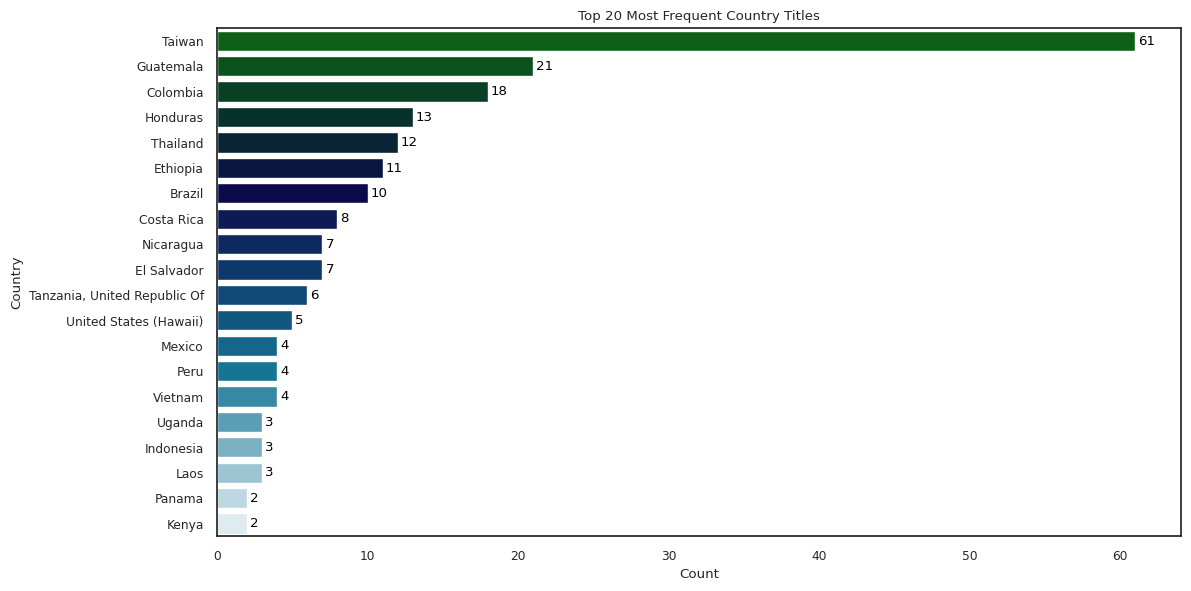

In [82]:
import matplotlib.pyplot as plt
import seaborn as sns

# Extract the "job title" column
Country = df['Country']

# Calculate the frequency of each job title
Country = Country.value_counts()

# Extract the top 20 most frequent job titles
top_20_titles = Country.head(20)

# Create a DataFrame for the top 20 titles
top_20_df = pd.DataFrame({'Country Title': top_20_titles.index, 'Count': top_20_titles.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=top_20_df, x='Count', y='Country Title', palette="ocean")
plt.xlabel('Count')
plt.ylabel('Country')
plt.title('Top 20 Most Frequent Country Titles')

# Add count labels to the bars
for i, v in enumerate(top_20_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

In [83]:
import plotly.express as px

fig = px.pie(df, names='Color', title='Coffee Colors')
fig.show()

In [84]:
fig=px.histogram(df, x="Acidity", color="Acidity")
fig.show()

In [85]:
fig=px.histogram(df, x="Aroma", color="Aroma")
fig.show()

<Figure size 1200x600 with 0 Axes>

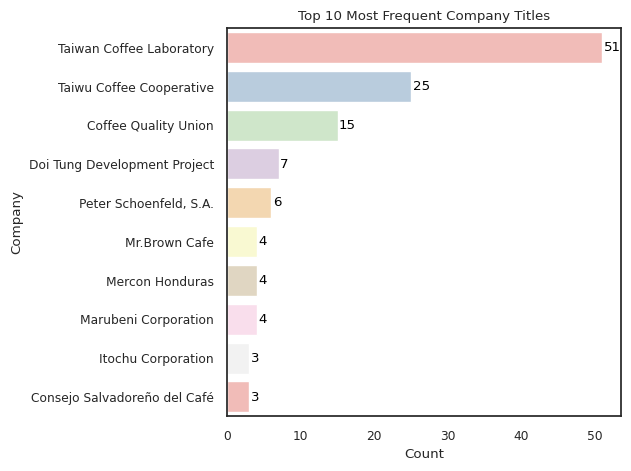

In [86]:
Company = df['Company']

Company = Company.value_counts()

top_10_Company = Company.head(10)

# Create a DataFrame for the top 10 titles
top_10_df = pd.DataFrame({'Company Title': top_10_Company.index, 'Count': top_10_Company.values})

# Plotting the count plot
plt.figure(figsize=(12, 6))
fig, ax = plt.subplots()
ax = sns.barplot(data=top_10_df, x='Count', y='Company Title', palette="Pastel1")
plt.xlabel('Count')
plt.ylabel('Company')
plt.title('Top 10 Most Frequent Company Titles')

# Add count labels to the bars
for i, v in enumerate(top_10_df['Count']):
    ax.text(v + 0.2, i, str(v), color='black', va='center')

plt.tight_layout()
plt.show()

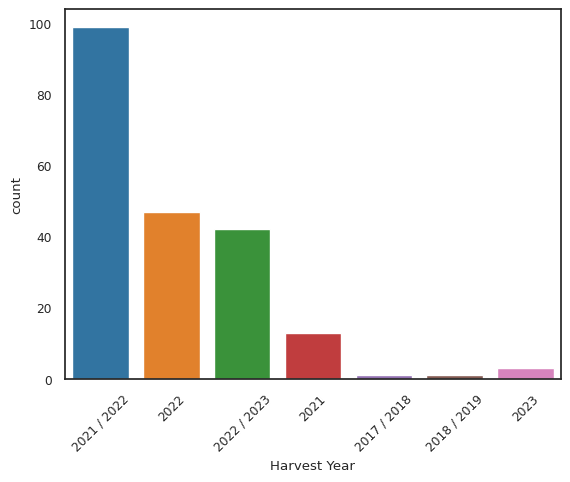

In [87]:
sns.countplot( x=df["Harvest Year"], palette="tab10")
plt.xticks(rotation=45)
plt.show()

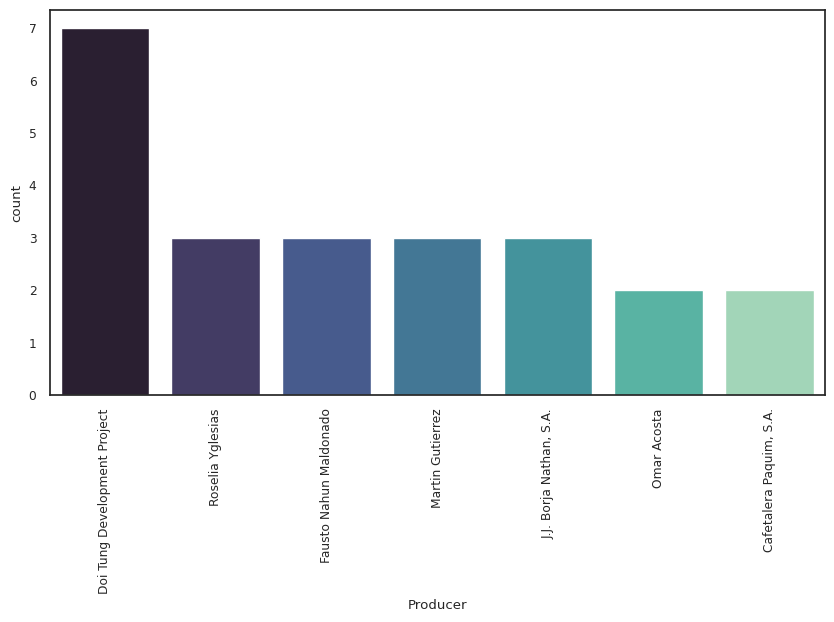

In [88]:
plt.figure(figsize=(10 ,5 ))
plt.xticks(rotation=90)
sns.countplot(data = df , x =df['Producer'] ,palette='mako',order=df['Producer'].value_counts().index[0:7])
plt.show()

# ***Multivariate Analysis***

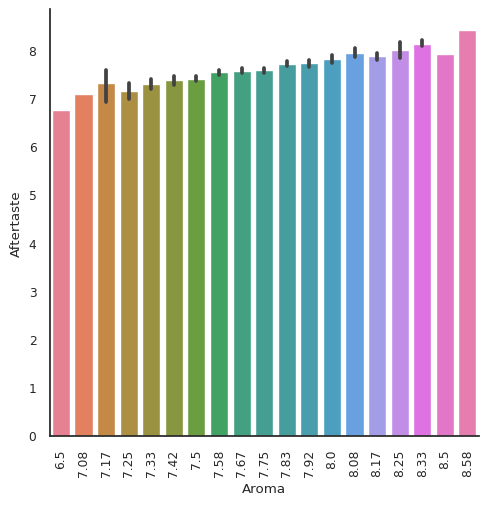

In [89]:
sns.catplot(data=df, kind="bar", x="Aroma", y="Aftertaste",palette="husl")
plt.xticks(rotation=90)
plt.show()

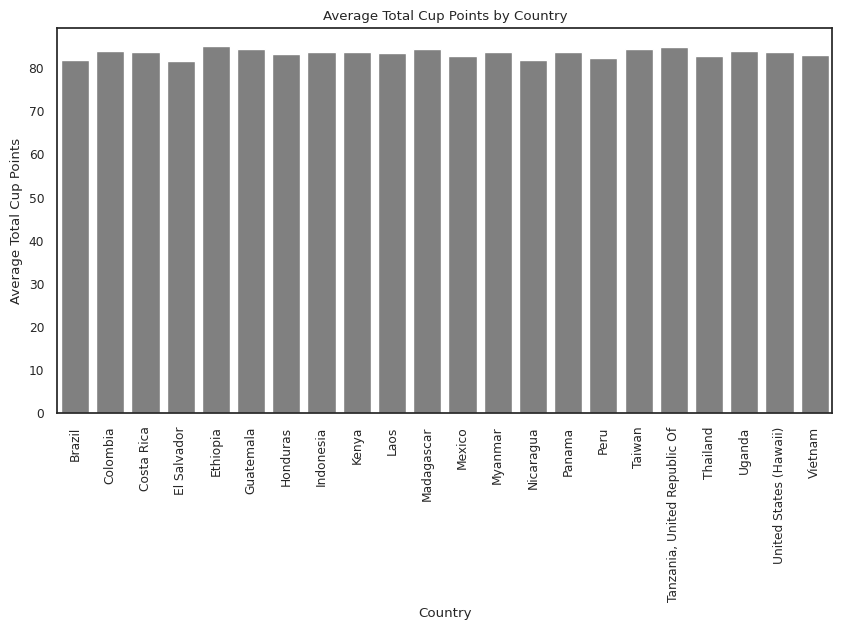

In [90]:
df_grouped = df.groupby('Country')['Total_Cup_Points'].mean().reset_index()

fig = px.choropleth(df_grouped,
                    locations='Country',
                    locationmode='country names',
                    color='Total_Cup_Points',
                    hover_name='Country',
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title='Average Total Cup Points by Country')

fig.show()

plt.figure(figsize=(10, 5))
sns.barplot(x=df_grouped['Country'], y=df_grouped['Total_Cup_Points'], color='gray')
plt.title('Average Total Cup Points by Country')
plt.xlabel('Country')
plt.ylabel('Average Total Cup Points')
plt.xticks(rotation=90)
plt.show()

In [91]:
data = df.copy()
categorical_columns = ['Processing Method']
numerical_columns = ['Altitude', 'Aroma', 'Flavor', 'Aftertaste', 'Acidity', 'Body', 'Balance', 'Overall', 'Total_Cup_Points', 'Moisture_Percentage', 'Category One Defects', 'Quakers', 'Category_Two_Defects', 'Uniformity']
columns_to_drop = ['Clean Cup', 'Sweetness', 'Country', 'Color', 'Owner', 'Certification_Contact', 'Certification_Address', 'Farm_Name', 'Lot_Number', 'Mill', 'Company', 'Expiration', 'Harvest Year',
                   'Number of Bags', 'Bag Weight', 'In-Country Partner', 'Grading Date', 'Variety', 'Status', 'Certification_Body']
data.drop(columns_to_drop, axis=1, inplace=True)
dummy_variables = pd.get_dummies(data, columns=categorical_columns, drop_first=False)

In [92]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaled_numerical = scaler.fit_transform(data[numerical_columns])

scaled_numerical_df = pd.DataFrame(scaled_numerical, columns=numerical_columns)

In [93]:
print(data.head().T)

                                            0             1  \
Altitude                               1815.0        1200.0   
Region                         Piendamo,Cauca        Chiayi   
Producer                Diego Samuel Bermudez           曾福森   
Processing Method     Double Anaerobic Washed  Washed / Wet   
Aroma                                    8.58           8.5   
Flavor                                    8.5           8.5   
Aftertaste                               8.42          7.92   
Acidity                                  8.58           8.0   
Body                                     8.25          7.92   
Balance                                  8.42          8.25   
Uniformity                               10.0          10.0   
Overall                                  8.58           8.5   
Total_Cup_Points                        89.33         87.58   
Moisture_Percentage                      11.8          10.5   
Category One Defects                        0          

In [94]:
dummy_variables = dummy_variables.drop(numerical_columns, axis=1)

processed_df = pd.concat([dummy_variables, scaled_numerical_df], axis=1)

<ipython-input-95-b962ff29f1b7>:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



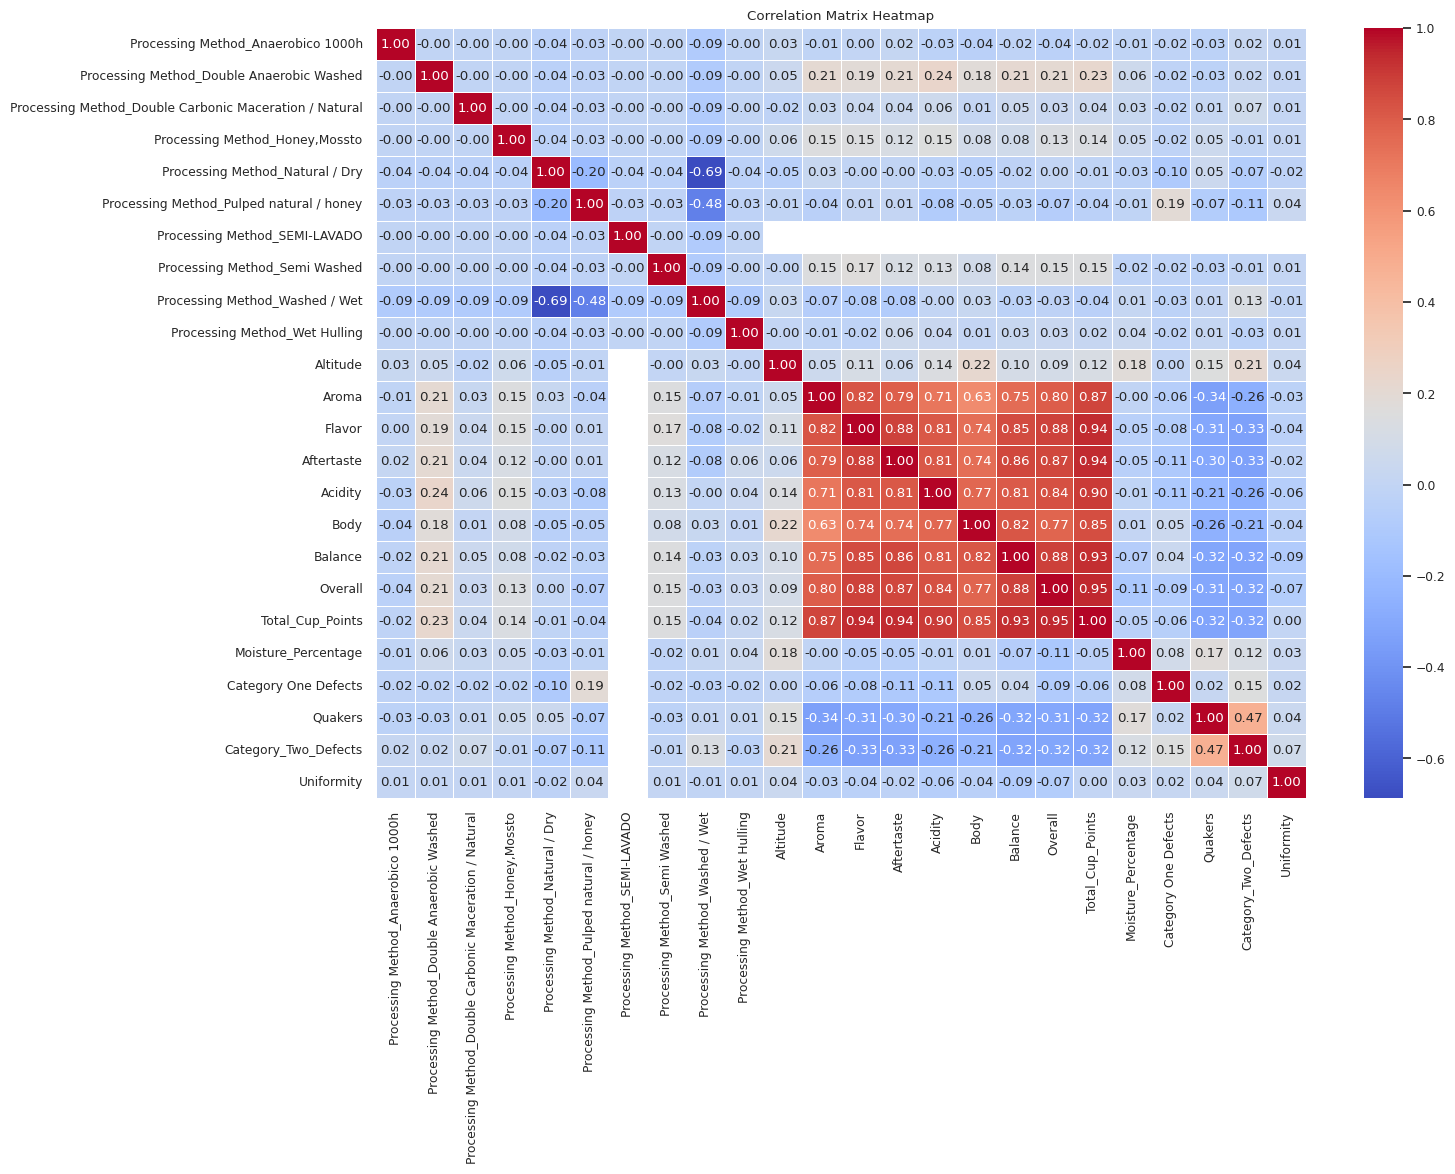

<ipython-input-95-b962ff29f1b7>:8: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



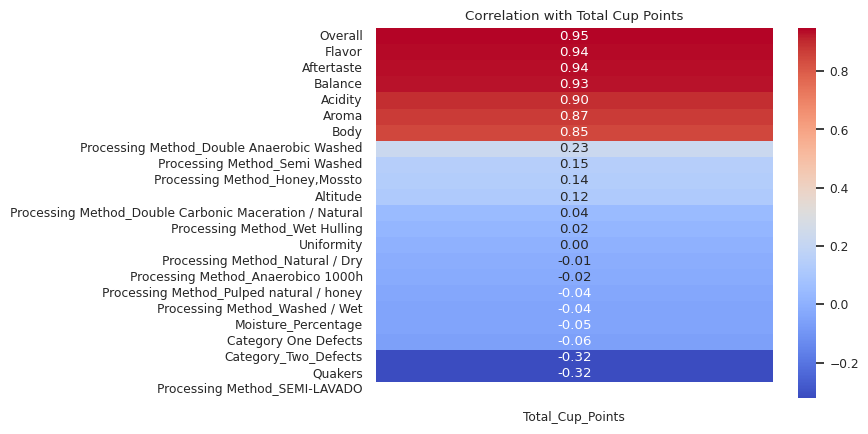

In [95]:
correlation_matrix = processed_df.corr()

plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()

corr = processed_df.corr()
target_corr = corr['Total_Cup_Points'].drop('Total_Cup_Points')

target_corr_sorted = target_corr.sort_values(ascending=False)

sns.set(font_scale=0.8)
sns.set_style("white")
sns.set_palette("PuBuGn_d")
sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
plt.title('Correlation with Total Cup Points')
plt.show()